In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

brasil = pd.read_csv('/Users/thalesoliveira/Documents/CBPF/ML_course/Projeto/covid-19-data-master/public/data/vaccinations/country_data/Brazil.csv')
data = pd.read_csv('/Users/thalesoliveira/Documents/CBPF/ML_course/Projeto/covid-19-data-master/public/data/latest/owid-covid-latest.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    233 non-null    object 
 1   continent                                   220 non-null    object 
 2   location                                    233 non-null    object 
 3   last_updated_date                           233 non-null    object 
 4   total_cases                                 228 non-null    float64
 5   new_cases                                   228 non-null    float64
 6   new_cases_smoothed                          228 non-null    float64
 7   total_deaths                                220 non-null    float64
 8   new_deaths                                  220 non-null    float64
 9   new_deaths_smoothed                         220 non-null    float64
 10  total_cases_pe

In [5]:
data.head()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2022-03-23,177321.0,66.0,82.571,7657.0,1.0,0.857,...,NaN,NaN,37.746,0.50,64.83,0.511,NaN,NaN,NaN,NaN
1,OWID_AFR,NaN,Africa,2022-03-23,11474111.0,942.0,4782.429,251444.0,42.0,63.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2022-03-23,273164.0,18.0,51.429,3489.0,0.0,0.286,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
3,DZA,Africa,Algeria,2022-03-23,265585.0,12.0,12.714,6873.0,0.0,0.571,...,0.7,30.4,83.741,1.90,76.88,0.748,NaN,NaN,NaN,NaN
4,AND,Europe,Andorra,2022-03-23,39713.0,479.0,131.286,153.0,0.0,0.143,...,29.0,37.8,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN


In [18]:
# Replace the NaN with zeros.
data = data.fillna(0)

In [19]:
data.head()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2022-03-23,177321.0,66.0,82.571,7657.0,1.0,0.857,...,0.0,0.0,37.746,0.50,64.83,0.511,0.0,0.0,0.0,0.0
1,OWID_AFR,0,Africa,2022-03-23,11474111.0,942.0,4782.429,251444.0,42.0,63.143,...,0.0,0.0,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.0
2,ALB,Europe,Albania,2022-03-23,273164.0,18.0,51.429,3489.0,0.0,0.286,...,7.1,51.2,0.000,2.89,78.57,0.795,0.0,0.0,0.0,0.0
3,DZA,Africa,Algeria,2022-03-23,265585.0,12.0,12.714,6873.0,0.0,0.571,...,0.7,30.4,83.741,1.90,76.88,0.748,0.0,0.0,0.0,0.0
4,AND,Europe,Andorra,2022-03-23,39713.0,479.0,131.286,153.0,0.0,0.143,...,29.0,37.8,0.000,0.00,83.73,0.868,0.0,0.0,0.0,0.0


In [60]:
def cut_events(data,metric,value):
    for i in range(data.shape[0]): # loop over all countries
        if data[metric][i] < value: 
            print(i,data['location'][i],data[metric][i])
    

In [57]:
def plot_scatter(data, x,y,xlabel,ylabel,name_fig):
    plt.figure(figsize=(10,6))
    plt.scatter(data[x],data[y])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.savefig(name_fig+'.pdf')
    plt.show()
    
    

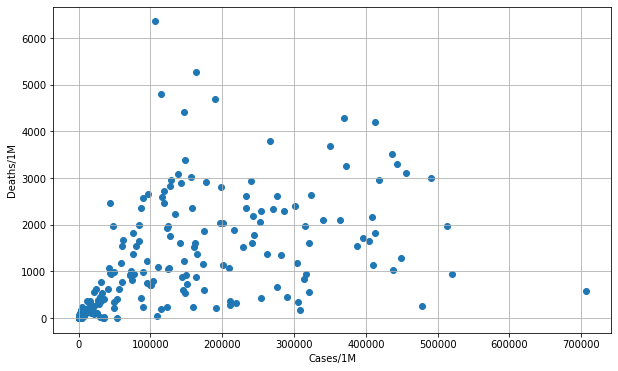

In [58]:
plot_scatter(data, 'total_cases_per_million','total_deaths_per_million','Cases/1M','Deaths/1M','test')

In [ ]:
 plt.figure(figsize=(10,6))
plt.scatter(data['total_cases_per_million'], data['total_deaths_per_million'])
plt.xlabel('Cases/1M')
plt.ylabel('Deaths/1M')
plt.grid()
plt.savefig('casesperM_vs_deathsperM.pdf')
plt.show()

# Plot deaths x cases (per 1M)


In [23]:
data.shape

(233, 67)

In [52]:
for i in range(data.shape[0]): # loop over all countries
    if data['human_development_index'][i] < 0.1: 
        print(i,data['location'][i],data['human_development_index'][i])

1 Africa 0.0
6 Anguilla 0.0
10 Aruba 0.0
11 Asia 0.0
23 Bermuda 0.0
26 Bonaire Sint Eustatius and Saba 0.0
30 British Virgin Islands 0.0
39 Cayman Islands 0.0
47 Cook Islands 0.0
52 Curacao 0.0
68 Europe 0.0
69 European Union 0.0
70 Faeroe Islands 0.0
71 Falkland Islands 0.0
75 French Polynesia 0.0
81 Gibraltar 0.0
83 Greenland 0.0
86 Guernsey 0.0
91 High income 0.0
98 International 0.0
102 Isle of Man 0.0
107 Jersey 0.0
112 Kosovo 0.0
123 Low income 0.0
124 Lower middle income 0.0
126 Macao 0.0
139 Monaco 0.0
142 Montserrat 0.0
147 Nauru 0.0
150 New Caledonia 0.0
155 Niue 0.0
156 North America 0.0
159 Oceania 0.0
175 Saint Helena 0.0
178 Saint Pierre and Miquelon 0.0
181 San Marino 0.0
189 Sint Maarten (Dutch part) 0.0
193 Somalia 0.0
195 South America 0.0
205 Taiwan 0.0
215 Turks and Caicos Islands 0.0
221 Upper middle income 0.0
225 Vatican 0.0
228 Wallis and Futuna 0.0


In [42]:
data.iloc[29]

iso_code                                             BRA
continent                                  South America
location                                          Brazil
last_updated_date                             2022-03-23
total_cases                                   29738362.0
                                               ...      
human_development_index                            0.765
excess_mortality_cumulative_absolute                 0.0
excess_mortality_cumulative                          0.0
excess_mortality                                     0.0
excess_mortality_cumulative_per_million              0.0
Name: 29, Length: 67, dtype: object

In [33]:
for i in range(data.shape[0]): # loop over all countries
    if data['total_cases_per_million'][i] > 500e3: 
        print(i,data['total_cases_per_million'][i])
    

4 513392.973
56 520155.327
70 706541.904


In [35]:

print(data['population'][4])
print(data['population'][56])
print(data['population'][70])

77354.0
5813302.0
49053.0


706541.904


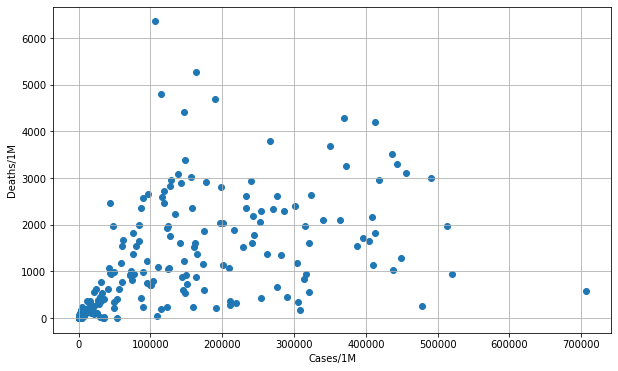

In [36]:
print(max(data['total_cases_per_million']))

for i in range(data.shape[0]):
    if data['total_cases_per_million'][i] > 500e3:
        continue;
    else:
        
        
    

plt.figure(figsize=(10,6))
plt.scatter(data['total_cases_per_million'], data['total_deaths_per_million'])
plt.xlabel('Cases/1M')
plt.ylabel('Deaths/1M')
plt.grid()
plt.savefig('casesperM_vs_deathsperM.pdf')
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # Create the model

In [92]:
cases = np.array(data['total_cases_per_million'])
deaths = np.array(data['total_deaths_per_million'])


In [93]:
deaths = deaths.reshape(cases.shape[0],1)
cases = cases.reshape(deaths.shape[0],1)

In [98]:
lin_reg.fit(cases,deaths)

LinearRegression()

In [99]:
coef = float(lin_reg.coef_)
print(coef)
inter = float(lin_reg.intercept_)
print(inter)

0.004630165451670281
493.4196111145518


In [110]:
pred = lin_reg.predict([[418000]]) # cases per 1M
print(pred)

[[2428.82876991]]


array([[2325.66405348]])

In [58]:
coef = float(lin_reg.coef_)
inter = float(lin_reg.intercept_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


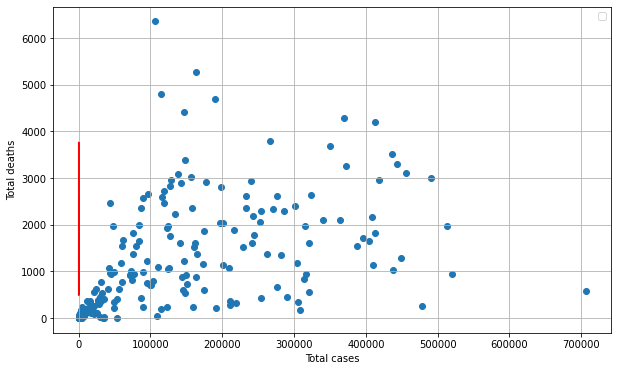

In [113]:
plt.figure(figsize=(10,6))
plt.scatter(cases,deaths)
plt.plot(lin_reg.predict(cases), color='red')
#lin_reg.coef_)+'\pm'+str(lin_reg.intercept_))''  # red line (regression)
plt.xlabel('Total cases')
plt.ylabel('Total deaths')
plt.legend(loc='best')
plt.grid()
plt.show()

#label='Model 1 (ROC-AUC = {:.3f})'.format(roc_auc))

# Cases x Tests

In [129]:
cases = np.array(data['total_cases']/data['population'])
tests = np.array(data['total_tests']/data['population'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


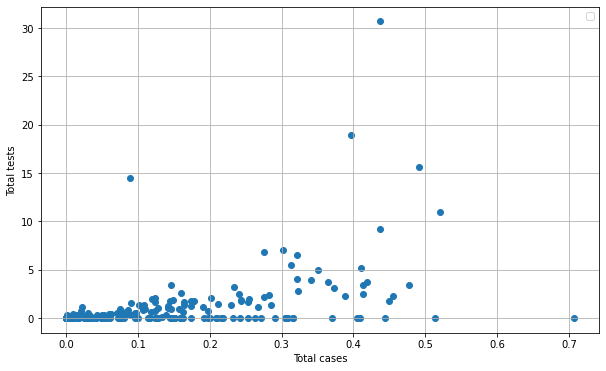

13
16
53
56
81
82
103
125
190
218
219


In [140]:
plt.figure(figsize=(10,6))
plt.scatter(cases,tests)
#plt.plot(lin_reg.predict(cases), color='red')
#lin_reg.coef_)+'\pm'+str(lin_reg.intercept_))''  # red line (regression)
plt.xlabel('Total cases')
plt.ylabel('Total tests')
plt.legend(loc='best')
plt.grid()
plt.show()

for j in range(data.shape[0]):
    if tests[j] > 5:
        print(j)

In [144]:
list_tests = [13,16,53,56,81,82,103,125,190,218,219]
for j in list_tests:
    print(data.iloc[j]['location'])

Austria
Bahrain
Cyprus
Denmark
Gibraltar
Greece
Israel
Luxembourg
Slovakia
United Arab Emirates
United Kingdom


# HDI x vaccination

In [62]:
vac_ratio =  data['people_fully_vaccinated']/data['population']

In [73]:
for j in range(data.shape[0]):
    if vac_ratio[j] > 1:
        print(j)

81


In [76]:
data.iloc[81]['population']

33691.0

In [75]:
data.iloc[81]['people_fully_vaccinated']

41101.0

In [68]:
HDI=data['human_development_index']
np.mean(HDI)

0.5860944206008584

In [114]:
vac_ratio = data['people_fully_vaccinated']/data['population']

In [115]:
max(vac_ratio)

1.2199400433350154

In [ ]:
if HDI < 0.1 :

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


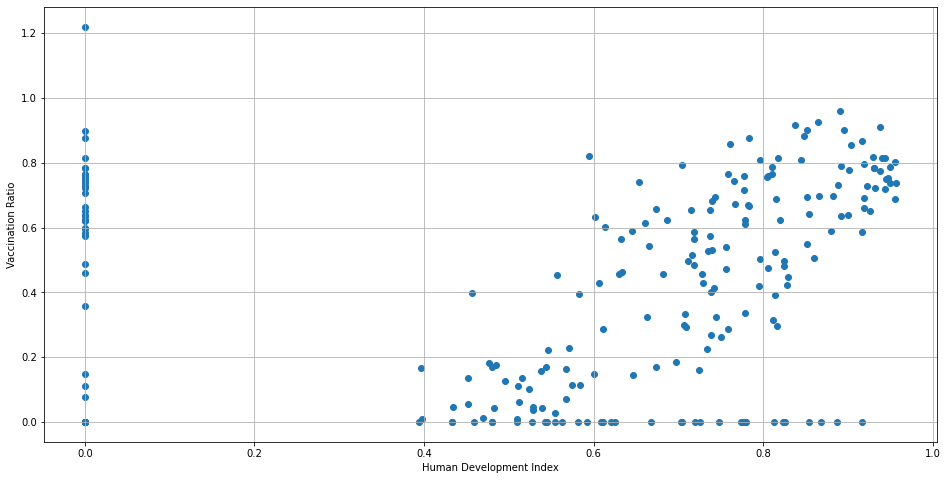

In [127]:
print(type(HDI))
print(type(vac_ratio))
plt.figure(figsize=(16,8))
#if HDI > 0.1 and vac_ratio < 1:
#    print(j)
plt.scatter(HDI, vac_ratio)
plt.xlabel('Human Development Index')
plt.ylabel('Vaccination Ratio')
plt.grid()

# GDP per capita x vaccination

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


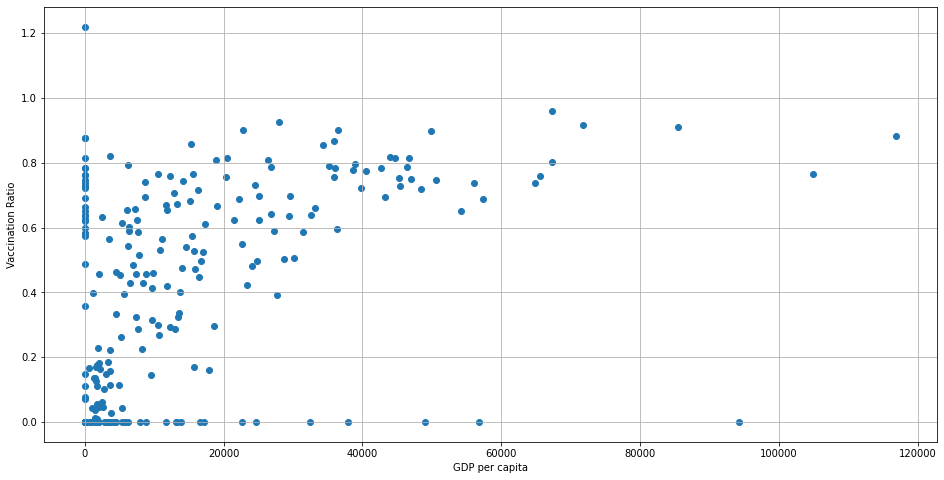

In [128]:
GDP = data['gdp_per_capita']

print(type(HDI))
print(type(vac_ratio))
plt.figure(figsize=(16,8))
#if HDI > 0.1 and vac_ratio < 1:
#    print(j)
plt.scatter(GDP, vac_ratio)
plt.xlabel('GDP per capita')
plt.ylabel('Vaccination Ratio')
plt.grid()

# Life expectancy x vaccination

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


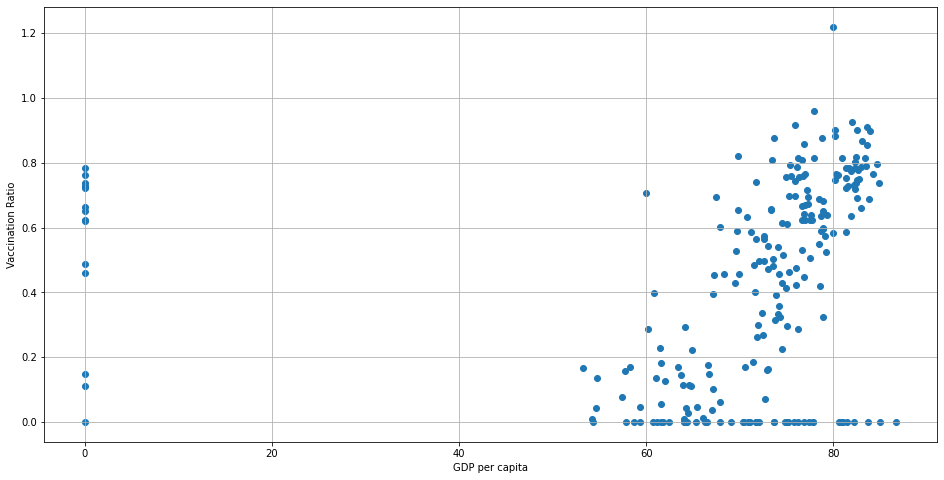

In [146]:
life_exp = data['life_expectancy']

print(type(HDI))
print(type(vac_ratio))
plt.figure(figsize=(16,8))
#if HDI > 0.1 and vac_ratio < 1:
#    print(j)
plt.scatter(GDP, vac_ratio)
plt.xlabel('GDP per capita')
plt.ylabel('Vaccination Ratio')
plt.grid()

# Total tests x GDP



<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


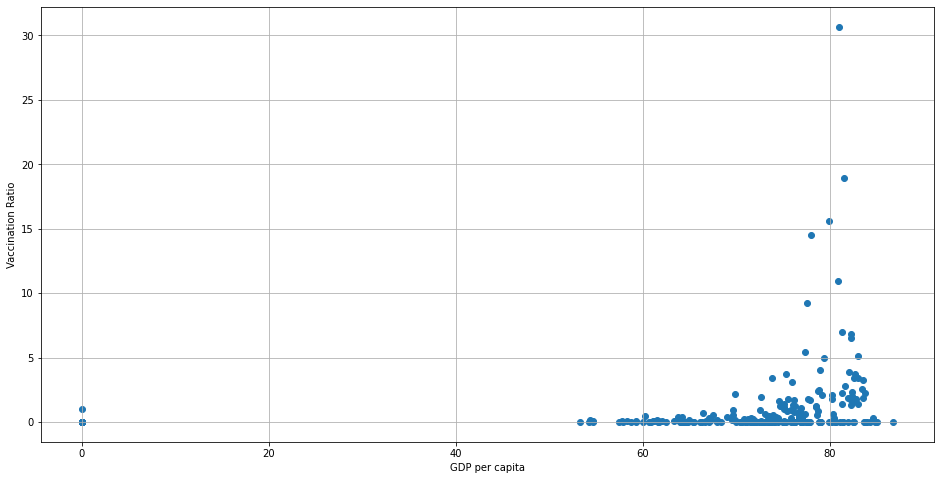

In [147]:


print(type(HDI))
print(type(vac_ratio))
plt.figure(figsize=(16,8))
#if HDI > 0.1 and vac_ratio < 1:
#    print(j)
plt.scatter(GDP, tests)
plt.xlabel('GDP per capita')
plt.ylabel('Vaccination Ratio')
plt.grid()

# Countries to be excluded

In [77]:
data.iloc[81] # Gibraltar (vaccination > population)

iso_code                                          GIB
continent                                      Europe
location                                    Gibraltar
last_updated_date                          2022-03-23
total_cases                                   16542.0
                                              ...    
human_development_index                           0.0
excess_mortality_cumulative_absolute              0.0
excess_mortality_cumulative                       0.0
excess_mortality                                  0.0
excess_mortality_cumulative_per_million           0.0
Name: 81, Length: 67, dtype: object